In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
%matplotlib inline

In [50]:
array = []
with open("ex1data1.txt", "r") as f:
  for line in f:
    array.append(line)
    
for i in range(len(array)):
    array[i] = array[i].replace("\n", "")
    
data = np.zeros([len(array) , 2])

for i in range(len(array)):
    temp = array[i].split(',')
    data[i] = temp

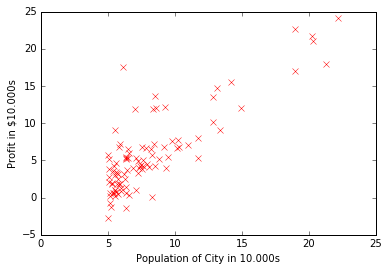

In [76]:
x = data[ : , 0 ]
t = data[ : , 1 ]
plt.plot( x , t , 'rx' )
plt.xlabel('Population of City in 10.000s')
plt.ylabel('Profit in $10.000s')
plt.axis([0 , 25 , -5 , 25])
plt.show()

## Choose a hypothesis function!

We choose a linear hypothesis function with * **x** = 'Population of City in 10.000s'* and a value * **y** = Profit in $10.000*. The idea here is to approximate our target values **t** with our value **y**. Therefore, we will train our linear model in order to predict the best weight **w** and the intercept value **b** (bias). $$y = wx + b$$

However we need some kind of metric to value how good or not is our approximation. In this case we will use a **Loss function** which will depend only from our trainable parameters **w** and **b**. 
$$L(w , b) = \frac{1}{2} \sum_{i = 1}^{N}(wx^{(i)} + b - t^{(i)})^2$$

Our task now is to find the best pair (w , b) such that L(w,b) is minimised. L is a nonnegative quadratic function and for this reason it has one critical point which also a minimum. In order to find the point (w , b) which minimizes L we set the partial derivatives equal to zero. $$\frac{\partial L}{\partial w} = 0 , \frac{\partial L}{\partial b} = 0$$

After some basic calculations we obtain the following equations:
\begin{equation}
b = \frac{\sum_{i = 1}^N t^{(i)} - \sum_{i = 1}^N x^{(i)}}{N}
\end{equation}

\begin{equation}
w = \frac{\sum_{i = 1}^N x^{(i)}t^{(i)} - b \sum_{i = 1}^N x^{(i)}}{\sum_{i = 1}^{n} (x^{(i)})^2}
\end{equation}

We will now write a function called *simple_linear_regression* which will implement all that we mentioned above.

In [77]:
def simple_linear_regression(input_feature, output):
    '''simple_linear_regression accepts as an input two matrices input_feature and output
    and is computing the values for the intercept and the slope for the linear model.'''
    
    # compute the mean of input_feature and output
    Xmean = np.mean(np.array(input_feature))
    Tmean = np.mean(np.array(output))

    
    # compute the product of the output and the input_feature and its mean
    XT = input_feature*output
    XTmean = np.mean(np.array(XT))
    
    # compute the squared value of the input_feature and its mean
    sqX = input_feature*input_feature
    sqXmean = np.mean(np.array(sqX))
    
    # use the formula for the slope
    slope = (XTmean - Xmean*Tmean)/(sqXmean - Xmean**2)
    
    # use the formula for the intercept
    intercept = Tmean - slope*Xmean
    
    return (intercept, slope)

In [78]:
(b , w) = simple_linear_regression(x , t)

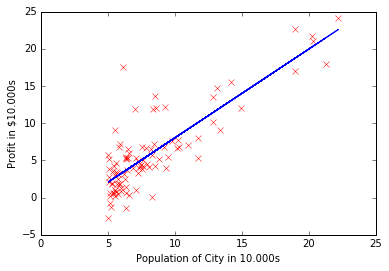

In [80]:
plt.plot( x , t , 'rx' )
plt.plot(x, x*w+b, 'b')
plt.xlabel('Population of City in 10.000s')
plt.ylabel('Profit in $10.000s')
plt.axis([0 , 25 , -5 , 25])
plt.show()